In [4]:
import numpy as np #importing numpy.
import pandas as pd #importing pandas.
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev
from scipy.ndimage.filters import gaussian_filter1d
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import numpy as np

## Mobility

In [5]:
df = pd.read_csv("applemobilitytrends.csv") 
# Preview the first 5 lines of the loaded data 
df.head()

,geo_type,region,transportation_type,alternative_name,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,...,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28
0,country/region,Albania,driving,NaN,100.0,95.30,101.43,97.20,103.55,112.67,...,24.55,31.51,33.59,31.69,33.94,30.22,25.22,30.39,37.39,36.69
1,country/region,Albania,walking,NaN,100.0,100.68,98.93,98.46,100.85,100.13,...,27.93,36.72,34.46,35.39,34.80,34.63,29.00,35.22,41.83,37.53
2,country/region,Argentina,driving,NaN,100.0,97.07,102.45,111.21,118.45,124.01,...,14.54,26.67,27.25,27.61,28.73,30.99,25.92,16.57,27.45,27.12
3,country/region,Argentina,walking,NaN,100.0,95.11,101.37,112.67,116.72,114.14,...,10.59,18.44,19.01,18.47,20.39,22.32,23.31,16.36,18.48,17.49
4,country/region,Australia,driving,NaN,100.0,102.98,104.21,108.63,109.08,89.00,...,53.34,56.93,58.06,59.69,62.87,47.84,41.89,55.39,59.09,59.46


In [6]:
################ step 1 ##############

# southkorea 
southkorea = df.loc[df['region'] == "Seoul"]
southkorea.head(7)

# TODO: Spain 

# TODO: Italy

,geo_type,region,transportation_type,alternative_name,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,...,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28
500,city,Seoul,driving,서울,100.0,100.66,102.36,110.03,124.82,114.68,...,51.53,54.63,52.78,56.89,58.45,65.23,61.27,57.84,58.06,62.91
501,city,Seoul,walking,서울,100.0,100.85,104.43,113.48,134.96,127.99,...,32.42,35.88,32.67,35.26,37.70,49.15,51.59,39.66,38.05,40.64


In [7]:
################ step 2 ##############

# [1] get headers (dates) (always)
headersk = list(df.columns.values)

# [2] extra cols (always)
headersk.pop(0)
headersk.pop(0)
headersk.pop(0)
headersk.pop(0)

##################### drop until first case #######################
# [3] change 7 based on first case in each country (depends)
# first date is always 13-1-2020 you want 20-1-2020 in Korea case

for x in range(0,7):
    headersk.pop(0)
print(len(headersk))


# [4] get driving (always)

drivingk = list(southkorea.iloc[0])
drivingk.pop(0)
drivingk.pop(0)
drivingk.pop(0)
drivingk.pop(0)

##################### drop until first case #######################
# change 7 based on first case in each country (depends)
# first date is always 13-1-2020 you want 20-1-2020 in Korea case

for x in range(0,7):
    drivingk.pop(0)


# [5] get walking (always)
    
walkingk = list(southkorea.iloc[1])
walkingk.pop(0)
walkingk.pop(0)
walkingk.pop(0)
walkingk.pop(0)

print(walkingk)

##################### drop until first case #######################
# change 7 based on first case (# depends)
for x in range(0,7):
    walkingk.pop(0)
print(len(walkingk))

100
[100.0, 100.85, 104.43, 113.48, 134.96, 127.99, 116.61, 108.14, 104.25, 97.35, 96.61, 102.11, 114.11, 110.58, 103.24, 106.27, 101.68, 111.75, 110.55, 85.79, 78.42, 79.81, 76.1, 70.49, 72.7, 83.34, 78.42, 77.69, 79.27, 76.88, 82.92, 84.83, 91.46, 76.45, 68.18, 77.37, 81.66, 82.46, 76.05, 75.54, 67.72, 63.38, 55.89, 59.06, 54.0, 43.17, 41.97, 37.88, 38.45, 35.88, 35.86, 34.98, 36.95, 38.55, 38.25, 40.22, 33.3, 35.72, 34.7, 38.99, 38.81, 35.21, 33.15, 33.46, 34.7, 32.73, 35.34, 45.46, 42.07, 39.99, 36.96, 39.03, 37.88, 35.61, 42.31, 40.02, 38.54, 38.57, 38.62, 37.36, 37.63, 45.59, 37.76, 37.17, 35.92, 37.53, 36.18, 37.31, 47.29, 39.34, 37.89, 39.21, 47.89, 40.2, 35.51, 44.68, 41.97, 32.42, 35.88, 32.67, 35.26, 37.7, 49.15, 51.59, 39.66, 38.05, 40.64]
100


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
banning gatherings
School closure
Pause plan


C:\Users\admin\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


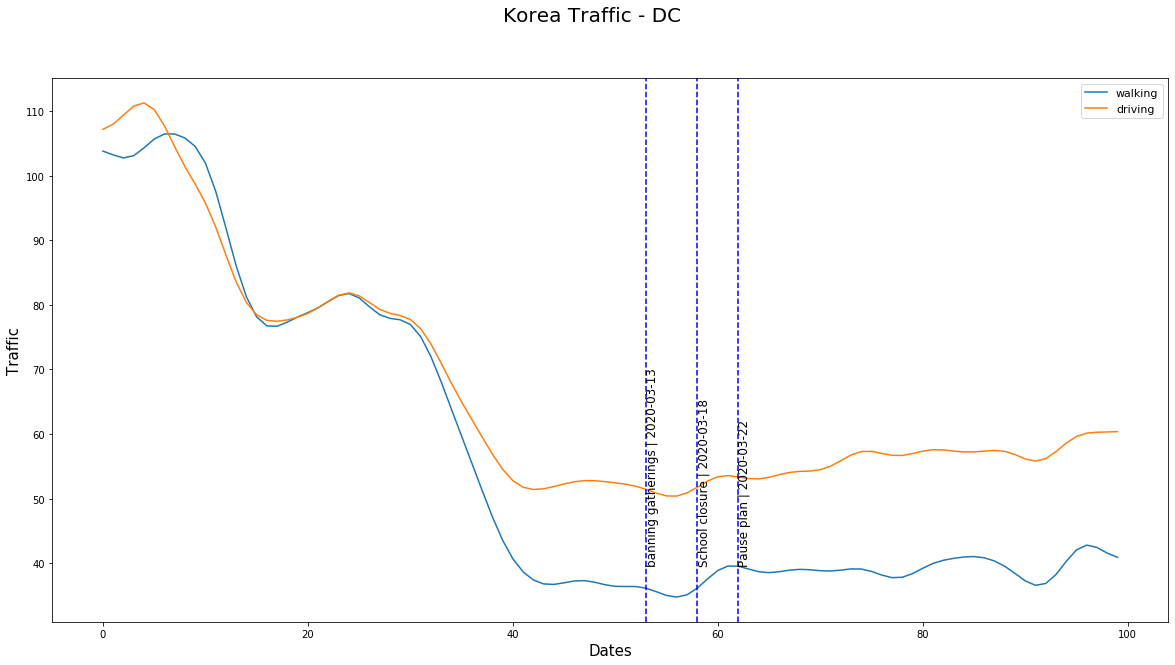

In [8]:
kdays = []

# map to days (always)
for x in range(0,len(headersk)):
    kdays.append(x)

print(kdays)
    
# store days and dates (always)
column_names = ["cases", "Days", "Dates", 'Actions']
eventk = pd.DataFrame(columns = column_names)

eventk['Cases'] = ''
# store days & headers here (always)
eventk['Days'] = kdays 
eventk['Dates'] = headersk
# leave it alone for now
eventk['Actions'] = ''


# TODO: change them based on country (depends)
ActionsDatek = ['2020-03-13','2020-03-18','2020-03-22']
ActionsValuek = ['banning gatherings','School closure','Pause plan']


# (always)
lis1 = []
z = 0
for w in ActionsDatek:
    for x in range(0,len(list(walkingk))):
        if(eventk.Dates.iloc[x] == w):
            eventk.Actions.iloc[x] = ActionsValuek[z]

    print(ActionsValuek[z])
    z = 1 + z
    

# (always)
evDaysk = eventk['Days']
evActionsk = list(eventk['Actions'])
evdatek = eventk['Dates']


# (always)
plt.figure(figsize=(20, 10))
ysmoothed = gaussian_filter1d(walkingk, sigma=2)
plt.plot(kdays, ysmoothed, label="walking")
ysmoothed2 = gaussian_filter1d(drivingk, sigma=2)
plt.plot(kdays, ysmoothed2, label="driving")
# (depends)
plt.suptitle('Korea Traffic - DC',size=20)
plt.xlabel("Dates",size=15)
plt.ylabel("Traffic",size=15)



j=0
for x in evDaysk:
    if evActionsk[j] != '':
        plt.axvline(x,color='b',linestyle='dashed')
        plt.text(x,40,evActionsk[j] + " | " + str(evdatek[j]),rotation=90,fontsize=12)
    j = j + 1

plt.legend(prop={'size': 11})
plt.show()